# Modelo - Série temporal StarLink 

- Nesse modelo série temporal com ações da starlink são de 6 mês para previsão.

In [1]:
# Versão do python

from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.8.8


In [2]:
# Importação das bibliotecas 

# Pandas carregamento csv
import pandas as pd 

# Numpy para carregamento cálculos em arrays multidimensionais
import numpy as np 

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Configuração para os gráficos largura e layout dos graficos

plt.rcParams["figure.figsize"] = (25, 20)

plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

m.rcParams['axes.labelsize'] = 25
m.rcParams['xtick.labelsize'] = 25
m.rcParams['ytick.labelsize'] = 25
m.rcParams['text.color'] = 'k'

In [3]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Author: Versões das bibliotecas

seaborn   : 0.11.1
matplotlib: 3.3.4
plotly    : 5.6.0
watermark : 2.3.0
pandas    : 1.2.4
numpy     : 1.21.5



# Base dados

In [5]:
df = pd.read_csv("SLNV2-USD.csv")
df

Date      Open      High       Low     Close  Adj Close  Volume
0    2021-09-20  0.002091  0.002160  0.001911  0.002115   0.002115   87456
1    2021-09-21  0.002114  0.002114  0.001884  0.001990   0.001990   56862
2    2021-09-22  0.002001  0.002009  0.001933  0.001983   0.001983   37911
3    2021-09-23  0.001983  0.001996  0.001875  0.001936   0.001936   50858
4    2021-09-24  0.001935  0.001956  0.001482  0.001589   0.001589   54174
..          ...       ...       ...       ...       ...        ...     ...
177  2022-03-16  0.000373  0.000390  0.000370  0.000375   0.000375   51144
178  2022-03-17  0.000375  0.000385  0.000365  0.000373   0.000373   49494
179  2022-03-18  0.000373  0.000393  0.000363  0.000366   0.000366   49083
180  2022-03-19  0.000366  0.000385  0.000366  0.000376   0.000376   41104
181  2022-03-20  0.000377  0.000409  0.000371  0.000385   0.000385   36709

[182 rows x 7 columns]

In [6]:
# Exibido 5 primeiros dados
df.head()

Date      Open      High       Low     Close  Adj Close  Volume
0  2021-09-20  0.002091  0.002160  0.001911  0.002115   0.002115   87456
1  2021-09-21  0.002114  0.002114  0.001884  0.001990   0.001990   56862
2  2021-09-22  0.002001  0.002009  0.001933  0.001983   0.001983   37911
3  2021-09-23  0.001983  0.001996  0.001875  0.001936   0.001936   50858
4  2021-09-24  0.001935  0.001956  0.001482  0.001589   0.001589   54174

In [7]:
# Exibido 5 últimos dados 
df.tail()

Date      Open      High       Low     Close  Adj Close  Volume
177  2022-03-16  0.000373  0.000390  0.000370  0.000375   0.000375   51144
178  2022-03-17  0.000375  0.000385  0.000365  0.000373   0.000373   49494
179  2022-03-18  0.000373  0.000393  0.000363  0.000366   0.000366   49083
180  2022-03-19  0.000366  0.000385  0.000366  0.000376   0.000376   41104
181  2022-03-20  0.000377  0.000409  0.000371  0.000385   0.000385   36709

In [8]:
# Número de linhas e colunas
df.shape

(182, 7)

In [9]:
# Verificando informações das variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       182 non-null    object 
 1   Open       182 non-null    float64
 2   High       182 non-null    float64
 3   Low        182 non-null    float64
 4   Close      182 non-null    float64
 5   Adj Close  182 non-null    float64
 6   Volume     182 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.1+ KB


In [10]:
# Exibido tipos de dados
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [11]:
# Total de colunas e linhas 

print("Números de linhas: {}" .format(df.shape[0]))
print("Números de colunas: {}" .format(df.shape[1]))

Números de linhas: 182
Números de colunas: 7


In [12]:
# Exibindo valores ausentes e valores únicos

print("\nMissing values :  ", df.isnull().sum().values.sum())
print("\nUnique values :  \n",df.nunique())


Missing values :   0

Unique values :  
 Date         182
Open         167
High         167
Low          163
Close        161
Adj Close    161
Volume       182
dtype: int64


In [13]:
# Sum() Retorna a soma dos valores sobre o eixo solicitado
# Isna() Detecta valores ausentes

df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
# Retorna a soma dos valores sobre o eixo solicitado
# Detecta valores não ausentes para um objeto semelhante a uma matriz.

df.notnull().sum()

Date         182
Open         182
High         182
Low          182
Close        182
Adj Close    182
Volume       182
dtype: int64

In [16]:
# Total de número duplicados

df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
177    False
178    False
179    False
180    False
181    False
Length: 182, dtype: bool

# Estatística descritiva

In [17]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

df.describe().T

count           mean            std           min           25%           50%           75%           max
Open       182.0       0.000895       0.000486      0.000366      0.000494      0.000698      0.001240  3.340000e-03
High       182.0       0.001038       0.000916      0.000375      0.000526      0.000749      0.001313  8.442000e-03
Low        182.0       0.000832       0.000419      0.000354      0.000476      0.000643      0.001151  2.475000e-03
Close      182.0       0.000886       0.000479      0.000366      0.000494      0.000685      0.001234  3.307000e-03
Adj Close  182.0       0.000886       0.000479      0.000366      0.000494      0.000685      0.001234  3.307000e-03
Volume     182.0  122758.417582  279130.237893  30048.000000  49589.000000  67464.500000  98114.750000  2.675716e+06

In [18]:
# Gráfico distribuição normal
plt.figure(figsize=(18.2, 8))

ax = sns.distplot(df['High']);
plt.title("Distribuição normal", fontsize=20)
plt.xlabel("Umidade")
plt.ylabel("Total")
plt.axvline(df['High'].mean(), color='b')
plt.axvline(df['High'].median(), color='r')
plt.axvline(df['High'].mode()[0], color='g');
plt.legend(["Media", "Mediana", "Moda"])
plt.show()

In [19]:
# Matriz correlação de pares de colunas, excluindo NA / valores nulos.
df.corr()

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.682896  0.983051  0.940376   0.940376  0.406396
High       0.682896  1.000000  0.682146  0.813889   0.813889  0.653307
Low        0.983051  0.682146  1.000000  0.954774   0.954774  0.346431
Close      0.940376  0.813889  0.954774  1.000000   1.000000  0.515813
Adj Close  0.940376  0.813889  0.954774  1.000000   1.000000  0.515813
Volume     0.406396  0.653307  0.346431  0.515813   0.515813  1.000000

Text(0.5, 1.0, 'Matriz de correlação')

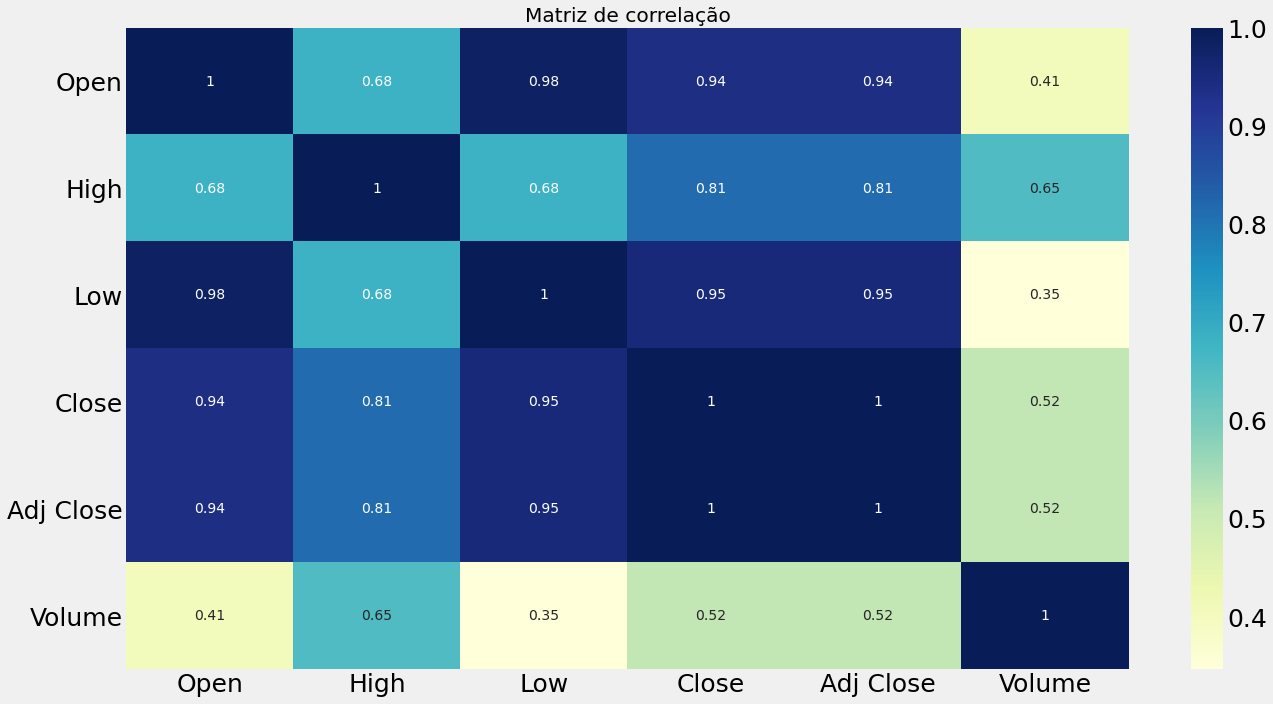

In [20]:
# Gráfico da matriz de correlação

plt.figure(figsize=(20,11))
ax = sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');
plt.title("Matriz de correlação")

In [22]:
# Matriz de correlação interativa 
fig = px.imshow(df.iloc[:, 1:].corr())
fig.show()

# Análise de dados

In [26]:
# Cálculo da média movel

media_alta = df[['Date', 'High']].groupby('Date').mean()
media_baixa = df[["Date", "Low"]].groupby('Date').mean()

print("Média de média alta", media_alta)
print()
print("Média de média media baixa", media_baixa)

Média de média alta                 High
Date                
2021-09-20  0.002160
2021-09-21  0.002114
2021-09-22  0.002009
2021-09-23  0.001996
2021-09-24  0.001956
...              ...
2022-03-16  0.000390
2022-03-17  0.000385
2022-03-18  0.000393
2022-03-19  0.000385
2022-03-20  0.000409

[182 rows x 1 columns]

Média de média media baixa                  Low
Date                
2021-09-20  0.001911
2021-09-21  0.001884
2021-09-22  0.001933
2021-09-23  0.001875
2021-09-24  0.001482
...              ...
2022-03-16  0.000370
2022-03-17  0.000365
2022-03-18  0.000363
2022-03-19  0.000366
2022-03-20  0.000371

[182 rows x 1 columns]


In [28]:
# Gráfico média movel - Humidity e Wind speed

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(50.5, 25));
plt.rcParams['font.size'] = '25'

ax1.plot(media_alta, marker='o', color = 'blue', markersize = 15);
ax1.set(title="Média móvel - ações alta", xlabel = "Date", ylabel = "Humidity")

ax2.plot(media_baixa, marker='o', color = 'blue', markersize = 15);
ax2.set(title="Média móvel - ações baixa", xlabel="Date", ylabel="Wind speed")

[Text(0.5, 1.0, 'Média móvel - ações baixa'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Wind speed')]

In [31]:
# Gráfico ações em alta
fig = px.line(df, x="Date", y="High", title="Ações em alta")
fig.show()

In [32]:
# Gráfico da ações em baixo
fig = px.line(df, x="Date", y="Low", title="Ações em baixo")
fig.show()

In [33]:
# Gráfico da ações em fechado
fig = px.line(df, x="Date", y="Close", title="Ações em fechado")
fig.show()

In [35]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [42]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'], high=df['High'],
                low=df['Low'], close=df['Close'])
                     ])

fig.update_layout(
    title='Açãoes da Starlink',
    yaxis_title='Total',
    xaxis_title='Starlink Stock',
    xaxis_rangeslider_visible=False)
fig.show()

In [45]:
fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'], high=df['High'],
    low=df['Low'], close=df['Close'],
    increasing_line_color= 'cyan', decreasing_line_color= 'gray'
)])

fig.update_layout(
    title='Açãoes da Starlink',
    yaxis_title='Total',
    xaxis_title='Starlink Stock',
    xaxis_rangeslider_visible=False)
fig.show()

In [63]:
plt.figure(figsize=(15,6))
df['Open'].plot(color='r')
df['Close'].plot(color='g')
plt.xlabel('')
plt.title('Índice ação (Abertura e Fechamento)',size=15)
plt.legend()
plt.show()

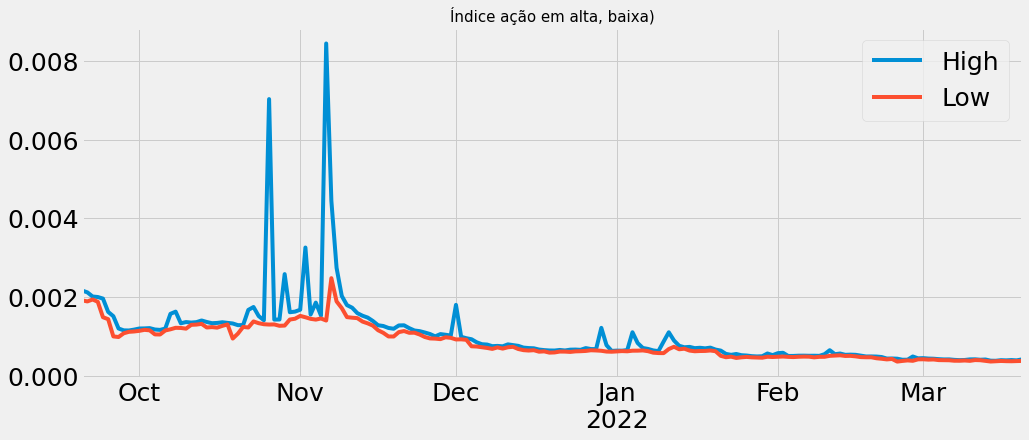

In [65]:
plt.figure(figsize=(15,6))
df['High'].plot()
df['Low'].plot()
plt.xlabel('')
plt.title('Índice ação em alta, baixa)',size=15)
plt.legend()
plt.show()

# Análise de dados = Univariada

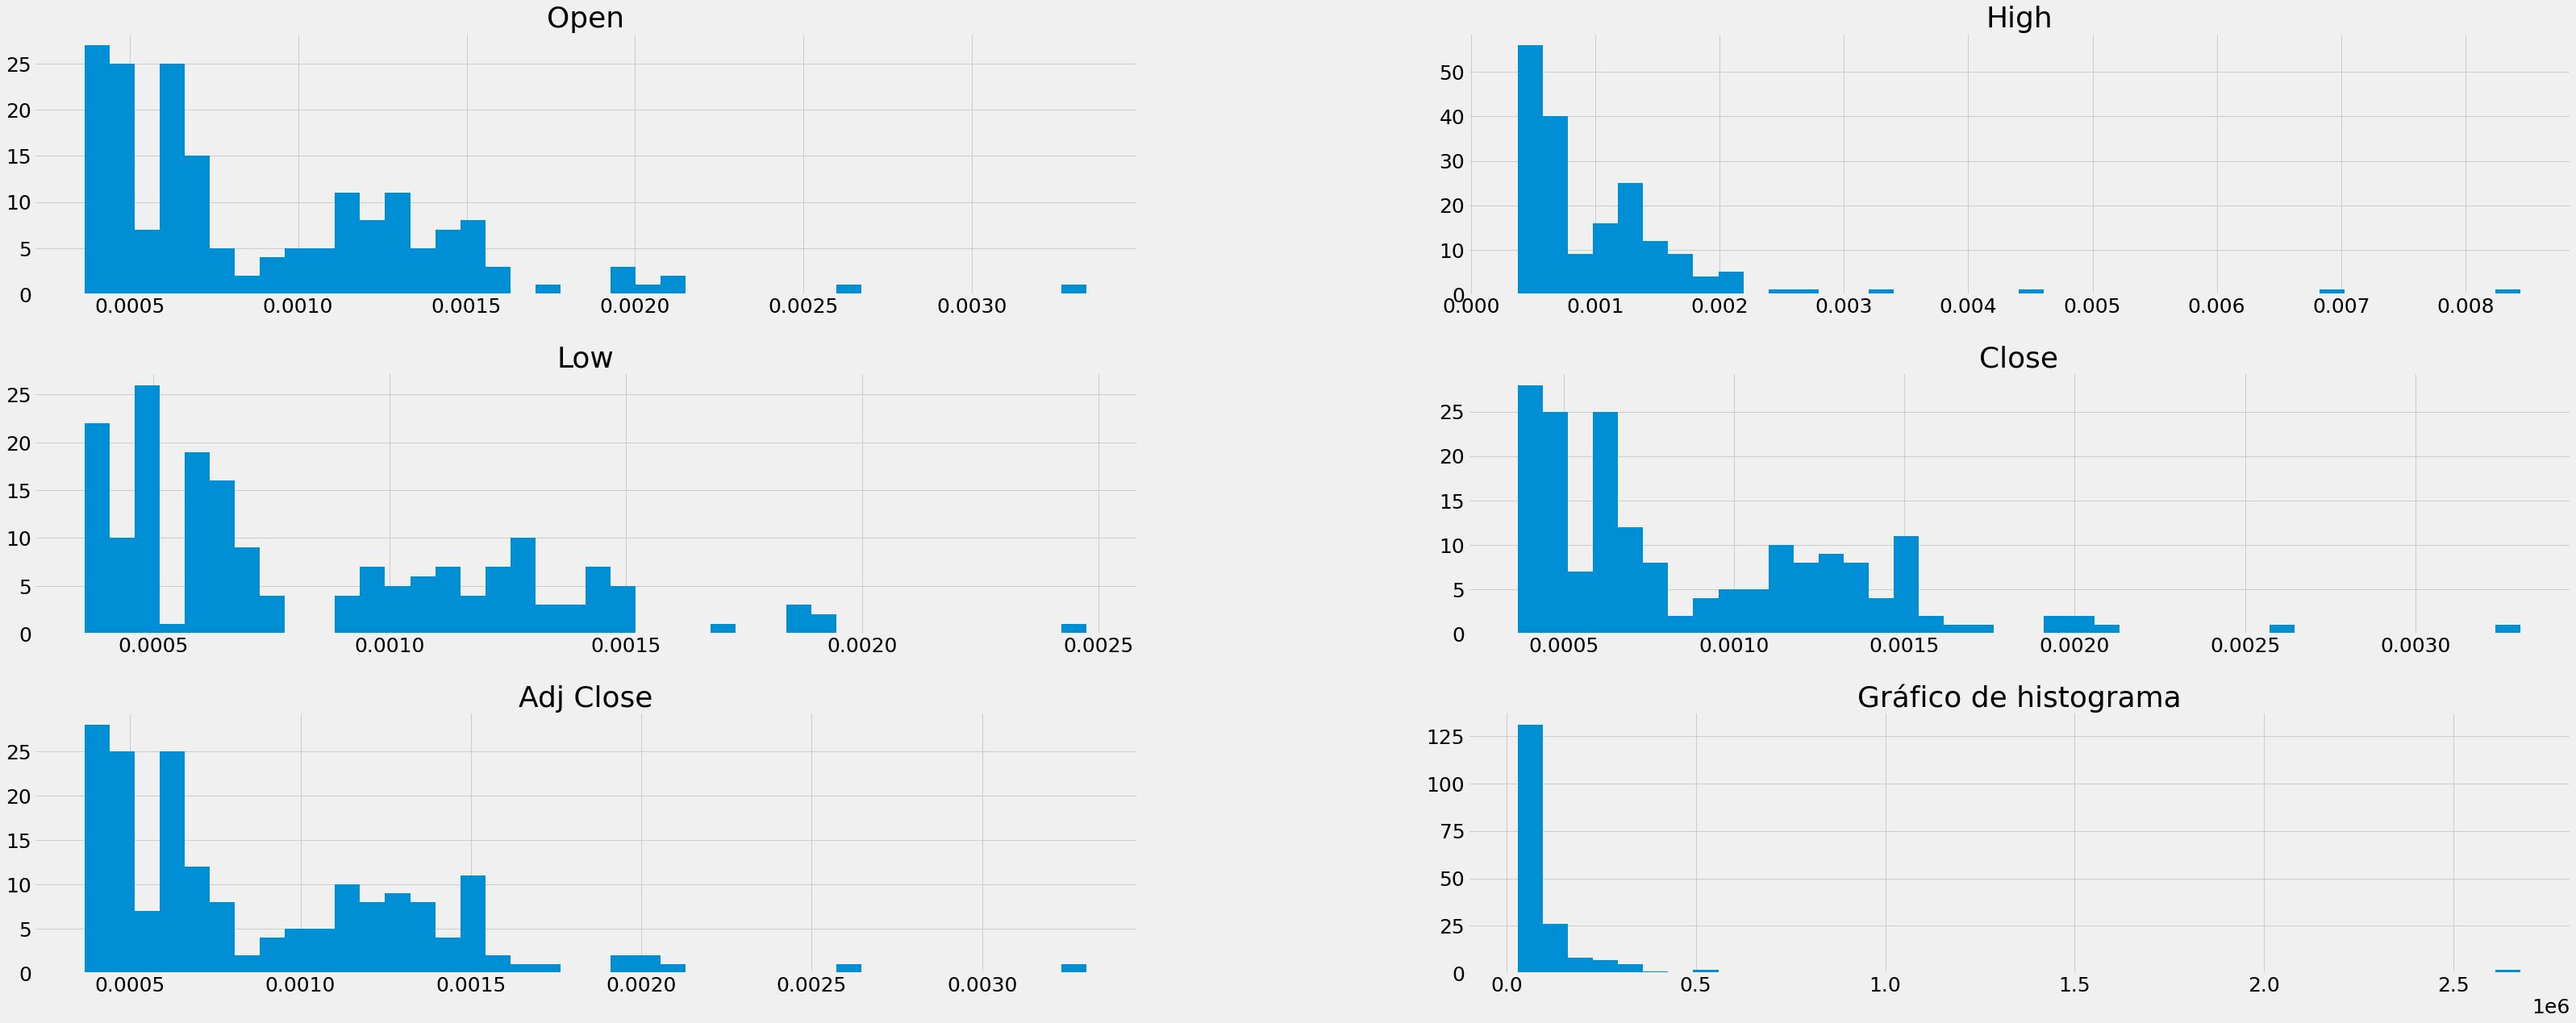

In [53]:
# Fazendo um comparativo dos dados 

df.hist(bins = 40, figsize=(50.2, 20))
plt.title("Gráfico de histograma")
plt.show()

In [54]:
# Plot total
df.plot(subplots=True, figsize=(20.5, 18))
plt.show()

# Decomposição Sazonal

In [60]:
dateparse= lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')
df=pd.read_csv('SLNV2-USD.csv',parse_dates=['Date'],index_col='Date',date_parser=dateparse)
df

Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2021-09-20  0.002091  0.002160  0.001911  0.002115   0.002115   87456
2021-09-21  0.002114  0.002114  0.001884  0.001990   0.001990   56862
2021-09-22  0.002001  0.002009  0.001933  0.001983   0.001983   37911
2021-09-23  0.001983  0.001996  0.001875  0.001936   0.001936   50858
2021-09-24  0.001935  0.001956  0.001482  0.001589   0.001589   54174
...              ...       ...       ...       ...        ...     ...
2022-03-16  0.000373  0.000390  0.000370  0.000375   0.000375   51144
2022-03-17  0.000375  0.000385  0.000365  0.000373   0.000373   49494
2022-03-18  0.000373  0.000393  0.000363  0.000366   0.000366   49083
2022-03-19  0.000366  0.000385  0.000366  0.000376   0.000376   41104
2022-03-20  0.000377  0.000409  0.000371  0.000385   0.000385   36709

[182 rows x 6 columns]

In [72]:
base = df["Close"]
base

Date
2021-09-20    0.002115
2021-09-21    0.001990
2021-09-22    0.001983
2021-09-23    0.001936
2021-09-24    0.001589
                ...   
2022-03-16    0.000375
2022-03-17    0.000373
2022-03-18    0.000366
2022-03-19    0.000376
2022-03-20    0.000385
Name: Close, Length: 182, dtype: float64

In [75]:
# Importação da biblioteca decomposição sazonal
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposição aditiva
sd = seasonal_decompose(base, freq = 12)
sd.plot()
plt.show()

<AxesSubplot:xlabel='Date'>

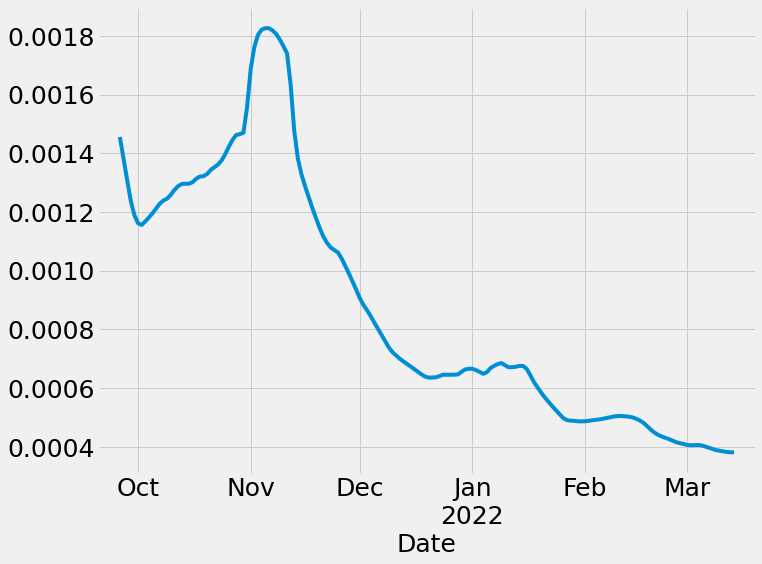

In [76]:
# Padrão de tendência extraído
dt = sd.trend

dt.plot(figsize=(10.5, 8))

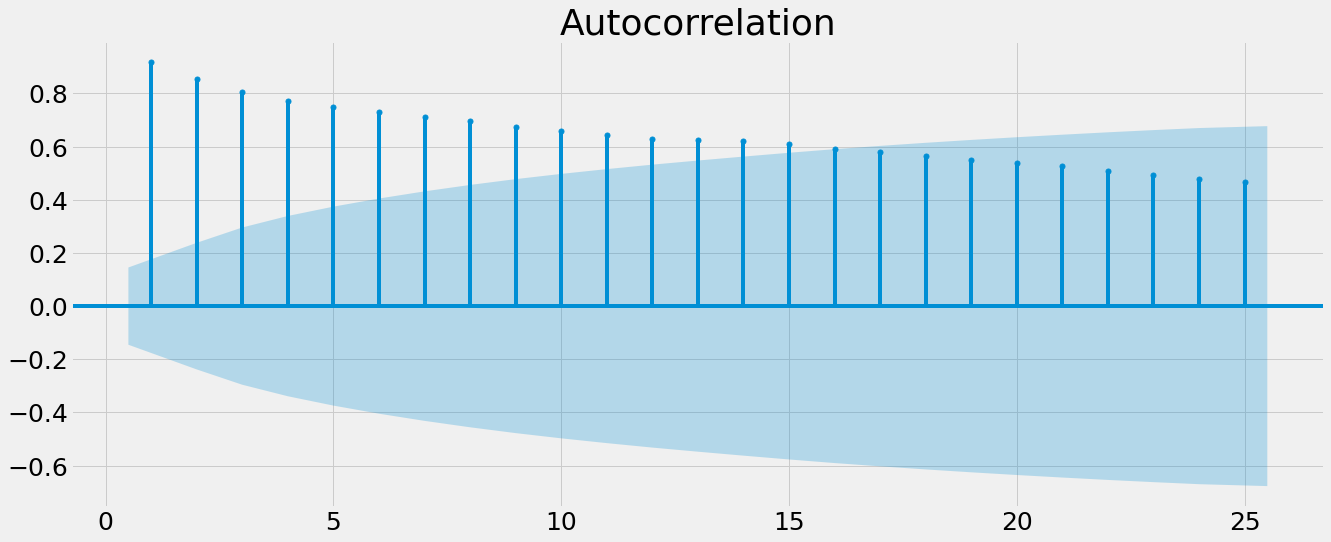

In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(20,8))
plot_acf(base, lags=25, zero=False, ax=ax)
plt.show()

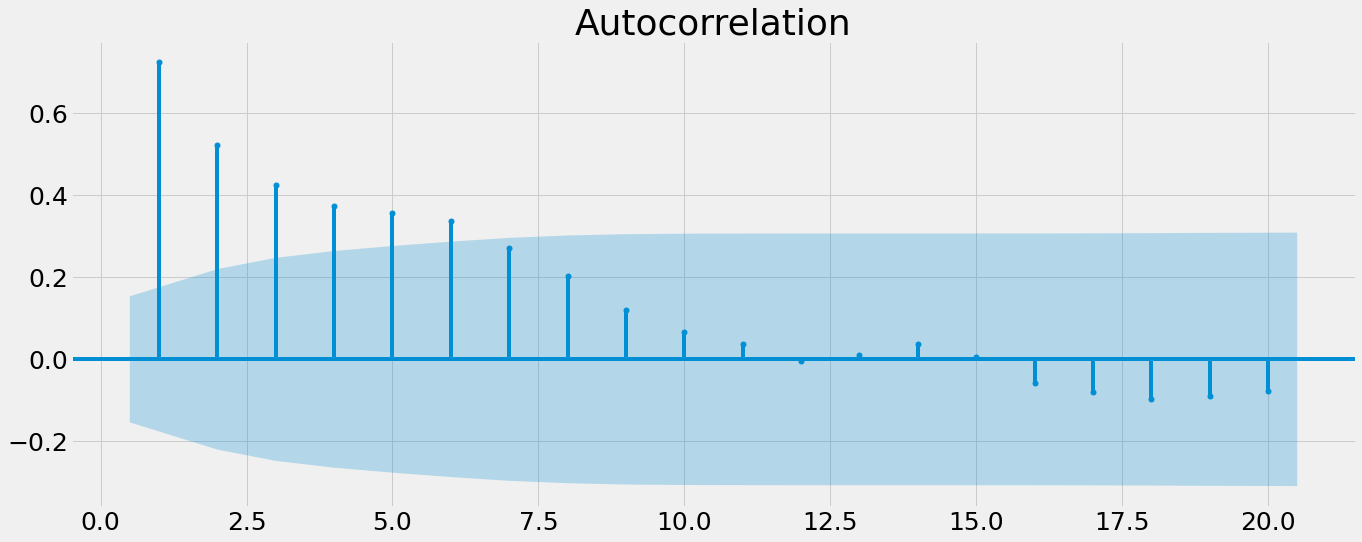

In [80]:
# Média movel
media_movel = base - base.rolling(20).mean()
media_movel = media_movel.dropna()

# Gráfico - Autocorrelation
fig, ax1 = plt.subplots(figsize=(20.5, 8))
plot_acf(media_movel, lags = 20, zero = False, ax = ax1)
plt.show()

In [81]:
# SARIMA

# Gráfico 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20.5, 18))
plot_acf(media_movel, lags=11, zero=False, ax=ax1)

# Gráfico PACF
plot_pacf(media_movel, lags=11, zero=False, ax=ax2)
plt.show()

In [82]:
# ACF corta no lag 1. então, temos que usar o modelo MA.

media_movel = media_movel.diff(1).diff(12).dropna()
media_movel

Date
2021-10-22    0.000049
2021-10-23    0.000006
2021-10-24   -0.000210
2021-10-25   -0.000029
2021-10-26    0.000116
                ...   
2022-03-16    0.000014
2022-03-17   -0.000017
2022-03-18   -0.000002
2022-03-19    0.000022
2022-03-20   -0.000002
Name: Close, Length: 150, dtype: float64

# Modelo ARIMA

**O ACF não sazonal não mostra nenhum dos padrões usuais dos modelos MA, AR ou ARMA, então não escolhemos nenhum deles. O Seaosnal ACF e PACF parecem um modelo MA(1). Selecionamos o modelo que combina ambos.**

- Modelo ARIMA 1

In [83]:
# Modelo ARIMA
from pmdarima.arima import auto_arima

modelo_arima_auto = auto_arima(base,easonal = True, 
                               m = 25, d = 0, D = 1, max_p = 2, max_q = 2,
                               trace = True, error_action ='ignore',
                               suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[25] intercept   : AIC=-2223.919, Time=5.42 sec
 ARIMA(0,0,0)(0,1,0)[25] intercept   : AIC=-1998.508, Time=0.15 sec
 ARIMA(1,0,0)(1,1,0)[25] intercept   : AIC=-2202.240, Time=2.47 sec
 ARIMA(0,0,1)(0,1,1)[25] intercept   : AIC=-2155.226, Time=2.19 sec
 ARIMA(0,0,0)(0,1,0)[25]             : AIC=-1979.856, Time=0.13 sec
 ARIMA(2,0,2)(0,1,1)[25] intercept   : AIC=-2228.350, Time=5.72 sec
 ARIMA(2,0,2)(0,1,0)[25] intercept   : AIC=-2167.116, Time=0.75 sec
 ARIMA(2,0,2)(0,1,2)[25] intercept   : AIC=-2163.117, Time=9.57 sec
 ARIMA(2,0,2)(1,1,0)[25] intercept   : AIC=-2199.001, Time=4.27 sec
 ARIMA(2,0,2)(1,1,2)[25] intercept   : AIC=-2161.117, Time=10.82 sec
 ARIMA(1,0,2)(0,1,1)[25] intercept   : AIC=-2232.845, Time=5.10 sec
 ARIMA(1,0,2)(0,1,0)[25] intercept   : AIC=-2171.333, Time=0.96 sec
 ARIMA(1,0,2)(1,1,1)[25] intercept   : AIC=-2229.544, Time=4.63 sec
 ARIMA(1,0,2)(0,1,2)[25] intercept   : AIC=-2167.325, Time=14.18 sec
 AR

- Modelo menor AIC e um pouco diferente anterior a componente sazonal Deltra e 1 ao invés 2

In [84]:
# Modelo - Auto ARIMA
modelo_arima_auto

ARIMA(order=(1, 0, 2), scoring_args={}, seasonal_order=(0, 1, 1, 25),
      suppress_warnings=True)

In [86]:
# Modelo aic - Maior que anterior modelo
modelo_arima_auto.aic()

-2232.8448976886225

In [88]:
# Súmario do modelo
print(modelo_arima_auto.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  182
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 25)   Log Likelihood                1122.422
Date:                              Sun, 20 Mar 2022   AIC                          -2232.845
Time:                                      17:01:20   BIC                          -2214.507
Sample:                                           0   HQIC                         -2225.397
                                              - 182                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.979e-05   5.93e-06     -3.339      0.001   -3.14e-05   -8.17e-06
ar.L1          0.90

# Previsão do modelo

In [90]:
modelo_arima_pred = modelo_arima_auto.predict(n_periods = 100)
modelo_arima_pred

array([ 3.08546772e-04,  2.88947819e-04,  2.57194833e-04,  2.54506132e-04,
        2.39006351e-04,  2.38872852e-04,  2.38969882e-04,  2.10284806e-04,
        1.84665898e-04,  1.86063642e-04,  1.57154517e-04,  1.46655226e-04,
        1.54547395e-04,  1.52678870e-04,  1.52439677e-04,  1.75076368e-04,
        1.36153878e-04,  1.00870340e-04,  9.11650705e-05,  7.58421808e-05,
        7.08823953e-05,  5.74935519e-05,  3.93159607e-05,  3.89674640e-05,
        5.05187425e-05, -7.42532662e-06, -1.51360417e-05, -3.91922358e-05,
       -3.48797856e-05, -4.40111822e-05, -3.83518747e-05, -3.29855950e-05,
       -5.68776596e-05, -7.81367500e-05, -7.27732311e-05, -9.80750104e-05,
       -1.05292989e-04, -9.44160736e-05, -9.35696165e-05, -9.13392073e-05,
       -6.64561194e-05, -1.03335243e-04, -1.36760094e-04, -1.44774666e-04,
       -1.58559664e-04, -1.62120554e-04, -1.74236934e-04, -1.91257068e-04,
       -1.90552719e-04, -1.78043752e-04, -2.35116688e-04, -2.42035004e-04,
       -2.65370417e-04, -

In [91]:
# Dataframe da previsão da ação

pred = pd.DataFrame(modelo_arima_pred, columns=["Previsão"])
pred

Previsão
0   0.000309
1   0.000289
2   0.000257
3   0.000255
4   0.000239
..       ...
95 -0.000601
96 -0.000613
97 -0.000630
98 -0.000629
99 -0.000617

[100 rows x 1 columns]

In [92]:
pd.concat([pred.Previsão],axis=1).plot(linewidth=1, figsize=(20,5))

plt.legend(["Previsão"])
plt.xlabel('Previsão da temperatura')
plt.title('Previsão',size=15)
plt.show();

# Model SARIMA

- SARIMA(2, 0, 2)x(2, 1, 0, 12) tem um desempenho melhor que outro modelo de ordens e tem baixo valor de AIC.
- Divida o conjunto de trem e o conjunto de teste do conjunto de dados de trem e ajuste nosso modelo.

In [170]:
# Modelo SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajuste o modelo SARIMAX ao conjunto de treino
modelo_sarimax = SARIMAX(base, order = (2,0, 2), seasonal_order = (2, 1, 0, 12))

# Treinamento do modelo SARIMA
modelo_sarimax_fit = modelo_sarimax.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [167]:
# Summary dos dados
print(modelo_sarimax_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  182
Model:             SARIMAX(2, 0, 2)x(2, 1, [], 12)   Log Likelihood                1194.653
Date:                             Sun, 20 Mar 2022   AIC                          -2375.307
Time:                                     17:18:30   BIC                          -2353.356
Sample:                                 09-20-2021   HQIC                         -2366.399
                                      - 03-20-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3542      0.008    161.364      0.000       1.338       1.371
ar.L2         -0.3898      

**Modelo SARIMAX**

- Prob(Q) é >0,05, então não rejeitamos a hipótese nula de que os resíduos não são correlacionados. Prob(JB) >0,05, então não rejeitamos a hipótese nula de que os resíduos não são normalmente distribuídos Assim, com base no resumo dado, os Resíduos não são correlacionados e normalmente distribuídos

In [171]:
# 4 gráfico diagnóstico do modelo SARIMA

modelo_sarimax_fit.plot_diagnostics(figsize=(28.5, 25))
plt.show()

**Standardized residul**

- O gráfico de resíduos padronizado informa que não há padrões óbvios nos resíduos A curva KDE é muito semelhante à distribuição normal. A maioria dos Datapoints está na linha reta. Além disso, correlações de 95% para atraso maior que um não são significativas Nosso modelo segue um comportamento padronizado. se não, temos que melhorar nosso modelo Prever os valores para o conjunto de teste

In [172]:
# Prever os valores para o conjunto de teste

x_1 = len(x)
y_2 = len(x) + len(y) - 1

pred = modelo_sarimax_fit.predict(start = x_1, end = y_2)
pred

2021-09-20    0.000000e+00
2021-09-21    1.438610e-16
2021-09-22    2.339814e-16
2021-09-23    3.040898e-16
2021-09-24    3.599425e-16
2021-09-25    3.856147e-16
2021-09-26    4.055625e-16
2021-09-27    4.053468e-16
2021-09-28    4.032905e-16
2021-09-29    4.062988e-16
2021-09-30    4.047574e-16
2021-10-01    3.916275e-16
2021-10-02    2.115000e-03
Freq: D, Name: predicted_mean, dtype: float64

In [179]:
# Previsão 

pred = modelo_sarimax_fit.predict(n_periods=150)
pred = pd.DataFrame(pred)
pred

predicted_mean
2021-09-20    0.000000e+00
2021-09-21    1.438610e-16
2021-09-22    2.339814e-16
2021-09-23    3.040898e-16
2021-09-24    3.599425e-16
...                    ...
2022-03-16    3.625495e-04
2022-03-17    3.805052e-04
2022-03-18    3.682387e-04
2022-03-19    3.595966e-04
2022-03-20    3.693257e-04

[182 rows x 1 columns]

<AxesSubplot:>

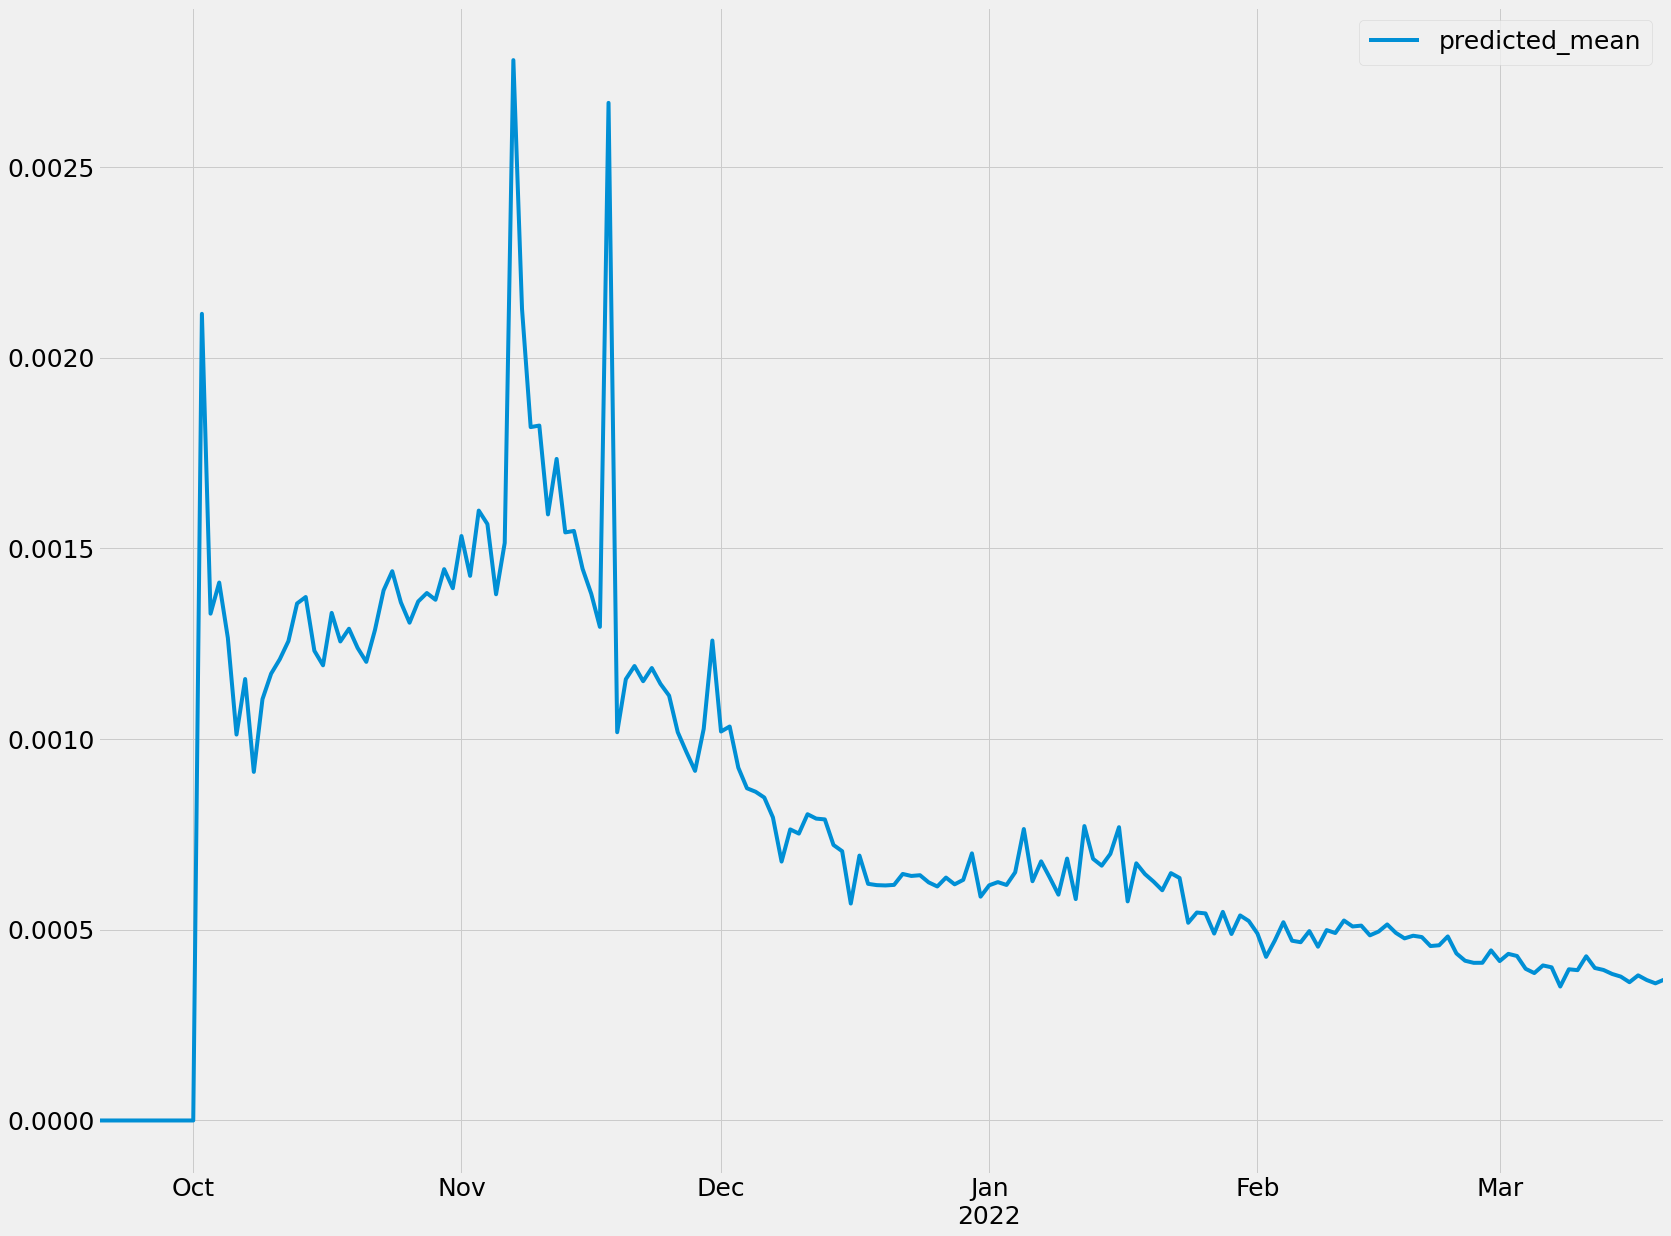

In [180]:
plt.plot(pred["predicted_mean"])
plt.title("Previsão modelo SARIMA - Ação")
plt.xlabel("Ação")
pred.plot(label='Previsão')

# Métricas para o modelo

- RMSE: Raiz do erro quadrático médio 
- MAE: Erro absoluto médio  
- MSE: Erro médio quadrático
- MAPE: Erro Percentual Absoluto Médio
- R2: O R-Quadrado, ou Coeficiente de Determinação, é uma métrica que visa expressar a quantidade da variança dos dados.

In [177]:
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(base, pred))
mae = mean_absolute_error(base, pred)
mape = mean_absolute_percentage_error(base, pred)
mse = mean_squared_error(base, pred)
r2 = r2_score(base, pred)

pd.DataFrame([rmse, mae, mse, mape, r2], ['RMSE', 'MAE', 'MSE', "MAPE",'R²'], columns=['Resultado'])

Resultado
RMSE  4.502424e-04
MAE   1.786880e-04
MSE   2.027182e-07
MAPE  1.467518e-01
R²    1.109788e-01